# COGS 108 - Final Project: Cryptocurrency and Covid-19

### Video: https://youtu.be/brnZQTwDWcY

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Overview

We wanted to find a correlation between the recorded rise in Covid-19 cases in the US with the unprecedented rise in cryptocurrencies prices. Our group used data that included the number of Covid-19 cases, the closing price of Ethereum, the closing price of Bitcoi and the closing price of the Nasdaq to serve as an indicator of the US economy, all of which were inumerated from January 21, 2020 to Feburary 7, 2022. Since our data is a time series, we used the appropriate data analysis techniques of finding the pairwise correlations. However, contrary to our hypothesis, no significant correlation was found between Covid-19 cases and cryptocurrency.

# Names

- Marco Paredes (A15951023)
- Alan Hang (A16409702)
- Zehong Li (A15852954)
- Danyal Iqbal (A16687740)

<a id='research_question'></a>
# Research Question

*Are covid cases a good predictor of the price of cryptocurrency?*

<a id='background'></a>

# Background & Prior Work

## Introduction

The COVID-19 pandemic had a drastic impact on the global economy as the markets around the world dropped immensely. On February 3rd, 2020, the U.S. government finally declared COVID-19 to be a Public Health Emergency. It is around this date that we saw the S&P 500 (consisting of the 500 leading U.S. publicly traded companies) drop by 32% [1]. Similarly, the price of BTC dropped around 30% around the same date [2]. The pandemic left a lasting scar on investor and consumer confidence as well as global value chain systems [3]. Although the COVID-19 outbreak created a scare in the global economy, many still saw it as an opportunity and sought out to buy more shares and cryptocurrency.

From 2020 to 2022, the global economy slowly recovered as governments passed relief packages and businesses changed their business models. The government around this time also introduced a lot of constraints in trading stocks in the hopes to help the market rise. Whether it had an impact or not, many software companies benefited from the rising dependence of technology and had increasing profit margins [4]. Similarly, cryptocurrencies such as Bitcoin and Ethereum had immense popularity, the price of bitcoin had a staggering 640% increase. It can be seen that there was a huge switch of interest from the stock market to cryptocurrency, and as a result its price surged. One of the reasons for the higher demand is the fact that investors realized that crypto trading could not be restricted by the government due to the fact that it can be traded from anywhere. Therefore, many investors preferred to switch their investments to the decentralized cryptomarket [5]. Many are confused, however, as some researchers believe that could not have been a strong enough reason for the rise of crypto. Cryptocurrencies have had a strong relationship with online criminal activity, and many people feared that using crypto would expose them to criminal charges [5]. Even so, there is no denying that there was huge rise in cryptocurrency prices during the pandemic, and many researchers are still confused why.

What is very interesting is that if the data during the pandemic where to be observed, as COVID cases rose by the millions, the price of bitcoin (and other cryptocurrencies) skyrocketed. In this research paper, we will explore if there is a relationship between cases and crypto prices and find a correlation. Additionally, we will also explore stock market data using NASDAQ databases and see if there was any correlation between COVID-19 cases and stock market prices.

## Prior Work
Unfortunately there are very few published research studies that speak on the relationship between COVID cases and crypto prices because the pandemic is still very recent. There is one study, however, that explores the trend between confirmed cases and Bitcoin, Bitcoin Cash, Ethereum prices. The study was conducted by Samuel Asumadu Sarkodie, Maruf YakubuAhmed, and Phebe Asantewaa Owusu. They observed a mean daily increase in market price of "Ethereum, Bitcoin, Litecoin, and Bitcoin Cash by 0.58%, 0.44%, 0.36%, and 0.15%––when COVID-19 confirmed cases and deaths increase by 3.77%, and 3.65% daily." They found an n-shaped relationship between the cases and each of the crypto prices. Finally, using Instrumental Variables regression and Resampled and Romano-Wolf adjusted p-values (to validate the the regression model) they found p-values < 0.01 for each variable at 95% Confidence Interval. In summary, with 95% confidence, the group concluded that their estimates rejected the null hypotheses, which is that "COVID-19 confirmed cases has no effect on Bitcoin, Litecoin, Ethereum, and Bitcoin cash and COVID-19 deaths have no effect on Bitcoin, Litecoin, Ethereum, and Bitcoin cash"[5]. In other words, COVID-19 cases and deaths did have an impact on the prices of large, well-known cryptocurrencies. In our own research, we will be exploring this more.

### References:
1. https://finance.yahoo.com/quote/%5EGSPC?p=%5EGSPC
2. https://www.coindesk.com/price/bitcoin/
3. https://www.sciencedirect.com/science/article/pii/S1544612321001306#bib0004
4. https://www.statista.com/statistics/1136209/five-year-revenue-growth-profit-margin-software-companies/
5. https://www.sciencedirect.com/science/article/pii/S1544612321001306

# Hypothesis


*We hypothesize that there is a positive correlation between covid cases and the price of cryptocurrencies. The reason for this being that there has been historical evidence of a continual rise of Bitcoin and Etheruem prices since the start of covid in the US. Investors may have found the decentralized nature of cryptocurrency more attractive when the economy of coutnries worldwide became shaky during the global pandemic.*

# Dataset(s)

- Dataset Name: Daily Ethereum(ETH) data
- Link to the dataset: https://raw.githubusercontent.com/alhang/csv-files/master/gemini_ETHUSD_day.csv
- Number of observations: 2101
- Description: Daily Ethereum(ETH) data will be used to see daily Bitcoin trends between 2020-2022. The data will indicate changes of the respective stock prices through the year


- Dataset Name: Daily Bitcoin(BTC) data
- Link to the dataset: https://raw.githubusercontent.com/alhang/csv-files/master/gemini_BTCUSD_day.csv
- Number of observations: 2315
- Description: Daily Bitcoin data will be used to see crypto trends between 2020-2022. The data will indicate changes of the respective stock prices through the year


- Dataset Name: Covid data
- Link to the dataset:https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv
- Number of observations: 782
- Description: The Covid data will provide data about covid cases in the US between January 2020 until Feburary 2022.


- Dataset Name: NASDAQ Historical data
- Link to the dataset: https://raw.githubusercontent.com/alhang/csv-files/master/NASDAQ_Historical.csv
- Number of observations: 1259
- Description: Stock market data from Janurary 2020 to Feburary 2022 will indicate stock prices through the year and their major changes. This dataset will be used to compare with the cryptocurrency prices, as stock prices are a good indicator of the economy and how it is affected during covid. 



# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest, t

In [2]:
eth_df_raw = pd.read_csv('https://raw.githubusercontent.com/alhang/csv-files/master/gemini_ETHUSD_day.csv', skiprows=1)
btc_df_raw = pd.read_csv('https://raw.githubusercontent.com/alhang/csv-files/master/gemini_BTCUSD_day.csv', skiprows=1)
covid_df_raw = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')
nasdaq_df_raw = pd.read_csv('https://raw.githubusercontent.com/alhang/csv-files/master/NASDAQ_Historical.csv')

# Data Cleaning

### Ethereum Dataframe

Let's take a look at the raw Etheruem dataframe and see what needs cleaning.

In [3]:
eth_df_raw

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1644206400000,2022-02-07 04:00:00,ETHUSD,3072.90,3195.00,3052.59,3134.06,11611.670047
1,1644120000000,2022-02-06 04:00:00,ETHUSD,3011.36,3077.03,2947.69,3072.90,9226.545834
2,1644033600000,2022-02-05 04:00:00,ETHUSD,3000.46,3062.85,2964.23,3011.36,7247.098604
3,1643947200000,2022-02-04 04:00:00,ETHUSD,2685.66,3018.68,2678.05,3000.46,30992.365110
4,1643860800000,2022-02-03 04:00:00,ETHUSD,2659.30,2700.00,2576.87,2685.66,11232.318486
...,...,...,...,...,...,...,...,...
2096,1463112000,2016-05-13 04:00:00,ETHUSD,10.40,11.59,10.20,10.50,1788.043079
2097,1463025600,2016-05-12 04:00:00,ETHUSD,10.45,12.00,9.92,10.40,2061.012106
2098,1462939200,2016-05-11 04:00:00,ETHUSD,9.74,10.47,9.69,10.45,3079.531401
2099,1462852800,2016-05-10 04:00:00,ETHUSD,9.36,9.95,9.36,9.74,764.628290


We clean the Ethereum data to only have the date, closing price, and volume from January 21, 2020 to Feburary 7, 2022. We also need to reverse the index order and store the result in **eth_df**.

In [4]:
eth_df = eth_df_raw.iloc[:749]
eth_df = eth_df.sort_values(by=['Date'], ascending=True)
eth_df = eth_df.reset_index()
eth_df = eth_df.drop(columns=['Unix Timestamp','Symbol','Open','High','Low','index'])
eth_df

,Date,Close,Volume
0,2020-01-21 04:00:00,168.40,7328.818633
1,2020-01-22 04:00:00,164.86,17002.813084
2,2020-01-23 04:00:00,159.13,778.257216
3,2020-01-24 04:00:00,158.89,7895.695345
4,2020-01-25 04:00:00,161.18,3947.211172
...,...,...,...
744,2022-02-03 04:00:00,2685.66,11232.318486
745,2022-02-04 04:00:00,3000.46,30992.365110
746,2022-02-05 04:00:00,3011.36,7247.098604
747,2022-02-06 04:00:00,3072.90,9226.545834


### Bitcoin Dataframe

Let's take a look at the raw Bitcoin dataframe and see what needs cleaning.

In [5]:
btc_df_raw

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1644206400000,2022-02-07 04:00:00,BTCUSD,42863.79,44543.78,42238.63,43857.45,1261.930492
1,1644120000000,2022-02-06 04:00:00,BTCUSD,41485.00,42980.00,41093.90,42863.79,750.096337
2,1644033600000,2022-02-05 04:00:00,BTCUSD,41487.51,41942.68,40971.46,41485.00,507.977777
3,1643947200000,2022-02-04 04:00:00,BTCUSD,37330.90,41996.48,37270.19,41487.51,2401.067754
4,1643860800000,2022-02-03 04:00:00,BTCUSD,36839.21,37454.49,36272.06,37330.90,1133.191332
...,...,...,...,...,...,...,...,...
2310,1444622400,2015-10-12 04:00:00,BTCUSD,248.98,248.98,245.75,245.75,71.047743
2311,1444536000,2015-10-11 04:00:00,BTCUSD,246.30,249.50,245.96,248.98,22.747091
2312,1444449600,2015-10-10 04:00:00,BTCUSD,245.51,246.30,244.60,246.30,30.870549
2313,1444363200,2015-10-09 04:00:00,BTCUSD,243.60,249.97,243.60,245.51,61.587068


We clean the Bitcoin data to only have the date, closing price, and volume from January 21, 2020 to Feburary 7, 2022. We also need to reverse the index order and store the result in **btc_df**.

In [6]:
btc_df = btc_df_raw.iloc[:749]
btc_df = btc_df.sort_values(by=['Date'], ascending=True)
btc_df = btc_df.reset_index()
btc_df = btc_df.drop(columns=['Unix Timestamp','Symbol','Open','High','Low','index'])
btc_df

,Date,Close,Volume
0,2020-01-21 04:00:00,8697.93,876.974281
1,2020-01-22 04:00:00,8559.71,585.652153
2,2020-01-23 04:00:00,8310.20,1649.808428
3,2020-01-24 04:00:00,8286.66,852.842705
4,2020-01-25 04:00:00,8346.01,308.447364
...,...,...,...
744,2022-02-03 04:00:00,37330.90,1133.191332
745,2022-02-04 04:00:00,41487.51,2401.067754
746,2022-02-05 04:00:00,41485.00,507.977777
747,2022-02-06 04:00:00,42863.79,750.096337


### Covid Dataframes

Let's take a look at the raw Covid cases dataframe and see what needs cleaning.

In [7]:
covid_df_raw

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
779,2022-03-10,79356489,964062
780,2022-03-11,79400847,965746
781,2022-03-12,79411749,966218
782,2022-03-13,79418131,966361


We clean the covid dataset to only have the date and cases from January 21, 2020 to Feburary 7, 2022 and reverse the order of the indices and store the result in **covid_df**.

In [8]:
covid_df = covid_df_raw.drop(columns=['deaths'])
covid_df = covid_df.iloc[:749]
covid_df

,date,cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3
...,...,...
744,2022-02-03,75924121
745,2022-02-04,76236325
746,2022-02-05,76359918
747,2022-02-06,76418395


We also want a column that has the number of new cases per day instead of total cases.

We initialize a new column named "New Cases" and make all values in the column NaN.

In [9]:
covid_df['new cases'] = np.nan
covid_df['new cases']=covid_df['cases'].diff()
covid_df.at[0,'new cases'] = 1
covid_df

,date,cases,new cases
0,2020-01-21,1,1.0
1,2020-01-22,1,0.0
2,2020-01-23,1,0.0
3,2020-01-24,2,1.0
4,2020-01-25,3,1.0
...,...,...,...
744,2022-02-03,75924121,312242.0
745,2022-02-04,76236325,312204.0
746,2022-02-05,76359918,123593.0
747,2022-02-06,76418395,58477.0


### Standarizing Dates for btc_df and eth_df

We need to standardize the dates for **btc_df** and **eth_df** to not include the time. This process will make analysis of the data easier.

In [10]:
def standardize_date(string):
    string = string.strip()
    
    string = string.replace(' 04:00:00','')
    
    if '/' in string:
        string = string[6:10]+'-'+string[0:2]+'-'+string[3:5]
    
    return string

We apply the standarize_date function to the **btc_df**.

In [11]:
btc_df['Date'] = btc_df['Date'].apply(standardize_date)
btc_df

,Date,Close,Volume
0,2020-01-21,8697.93,876.974281
1,2020-01-22,8559.71,585.652153
2,2020-01-23,8310.20,1649.808428
3,2020-01-24,8286.66,852.842705
4,2020-01-25,8346.01,308.447364
...,...,...,...
744,2022-02-03,37330.90,1133.191332
745,2022-02-04,41487.51,2401.067754
746,2022-02-05,41485.00,507.977777
747,2022-02-06,42863.79,750.096337


Next, we apply the standarize_date function again to the **eth_df**.

In [12]:
eth_df['Date'] = eth_df['Date'].apply(standardize_date)
eth_df

,Date,Close,Volume
0,2020-01-21,168.40,7328.818633
1,2020-01-22,164.86,17002.813084
2,2020-01-23,159.13,778.257216
3,2020-01-24,158.89,7895.695345
4,2020-01-25,161.18,3947.211172
...,...,...,...
744,2022-02-03,2685.66,11232.318486
745,2022-02-04,3000.46,30992.365110
746,2022-02-05,3011.36,7247.098604
747,2022-02-06,3072.90,9226.545834


Now, the timestamps are removed.

### Nasdaq Dataframe

Let's take a look at the raw Nasdaq dataframe and see what needs cleaning.

In [13]:
nasdaq_df_raw

,Date,Close/Last,Volume,Open,High,Low
0,02/10/2022,14185.64,--,14228.68,14509.56,14118.20
1,02/09/2022,14490.37,--,14368.16,14490.72,14330.87
2,02/08/2022,14194.45,--,13984.43,14226.48,13934.78
3,02/07/2022,14015.67,--,14118.79,14236.31,13974.10
4,02/04/2022,14098.01,--,13958.48,14222.76,13850.39
...,...,...,...,...,...,...
1254,02/17/2017,5838.58,--,5807.31,5838.58,5800.80
1255,02/16/2017,5814.90,--,5823.01,5835.15,5796.71
1256,02/15/2017,5819.44,--,5777.90,5821.95,5776.70
1257,02/14/2017,5782.57,--,5756.51,5783.09,5748.74


We clean the Nasdaq data to only include the date and the closing price from January 21, 2021 to now. We also need to reverse the index order and change the date from MM/DD/YY format to YY/MM/DD format and store the result in **nasdaq_df**.

In [14]:
nasdaq_df_raw['Date'] = nasdaq_df_raw['Date'].apply(standardize_date)
nasdaq_df = nasdaq_df_raw.iloc[:521]
nasdaq_df = nasdaq_df.sort_values(by=['Date'], ascending=True)
nasdaq_df = nasdaq_df.reset_index()
nasdaq_df = nasdaq_df.drop(columns=['Volume','Open','High','Low','index'])
nasdaq_df = nasdaq_df.iloc[:518]
nasdaq_df

,Date,Close/Last
0,2020-01-21,9370.81
1,2020-01-22,9383.77
2,2020-01-23,9402.48
3,2020-01-24,9314.91
4,2020-01-27,9139.31
...,...,...
513,2022-02-01,14346.00
514,2022-02-02,14417.55
515,2022-02-03,13878.82
516,2022-02-04,14098.01


However, there is an issue here. Even though the start and end dates of the dataframe are the same of the ones for **btc_df**, **eth_df**, and **covid_df**, there are less observations. This is due to the stock markets being closed on weekends and holidays. So, the next step of our data cleaning is to fill in the missing dates with the close prices of the last day the market were open. For example, if the markets were closed for the weekend, we'd use Firday's close price to fill in the missing dates. This process will make analysis more accurate as the dates will line up with the other dataframes.

Firstly, we take the usable data from **nasdaq_df** and store it in a temporary variable, **nasdaq_df_old**.

In [15]:
nasdaq_df_old = nasdaq_df

Then, we replace the dates in **nasdaq_df** with all the continuous dates from 2020-01-21 to 2022-02-07. This will take care of the missing dates. And then we turn the Close price to NaN values. We will fill these NaN values with the Close prices of temporary dataframe in the next step.

In [16]:
nasdaq_df = btc_df.drop(columns=['Close','Volume'])
nasdaq_df['Close'] = np.nan
nasdaq_df

,Date,Close
0,2020-01-21,NaN
1,2020-01-22,NaN
2,2020-01-23,NaN
3,2020-01-24,NaN
4,2020-01-25,NaN
...,...,...
744,2022-02-03,NaN
745,2022-02-04,NaN
746,2022-02-05,NaN
747,2022-02-06,NaN


This loop here will fill in the the missing Close prices with the Close prices of the last day the market was open. It does this by comparing the dates of the temporary dataframe **nasdaq_df_old** and the dates of the dataframe that will be used, **nasdaq_df**. If **nasdaq_df** has a date that **nasdaq_df_old** does not have, it fills in the Close price of the last day the market was open. If the dates are the same, then it just takes the Close price of that date from **nasdaq_df_old** to **nasdaq_df**.

In [17]:
i = 0
j = 0
while i < nasdaq_df.shape[0]:
    if nasdaq_df_old.iloc[j]['Date'] != nasdaq_df.iloc[i]['Date']:
        nasdaq_df.at[i,'Close'] = nasdaq_df_old.iloc[j-1]['Close/Last']
    else:
        nasdaq_df.at[i,'Close'] = nasdaq_df_old.iloc[j]['Close/Last']
        j+=1
    i+=1
nasdaq_df

,Date,Close
0,2020-01-21,9370.81
1,2020-01-22,9383.77
2,2020-01-23,9402.48
3,2020-01-24,9314.91
4,2020-01-25,9314.91
...,...,...
744,2022-02-03,13878.82
745,2022-02-04,14098.01
746,2022-02-05,14098.01
747,2022-02-06,14098.01


We can see now that nasdaq_df has the same number of observations as the other dataframes. We can also see that for dates 2022-02-05 and 2022-02-06, which did not exist in **nasdaq_df_old**, that they have the Close price of the last day the market was open which was on 2022-02-04.

### Missing Values

To check for missing values in all datasets, we run:

In [18]:
eth_df.isnull().values.any()

False

In [19]:
btc_df.isnull().values.any()

False

In [20]:
covid_df.isnull().values.any()

False

In [21]:
nasdaq_df.isnull().values.any()

False

Now all our datasets are clean and correctly formatted for analysis.

# Data Analysis & Results (EDA)

Data visualization for the price of Etheruem from 2020-01-21 to 2022-02-07 stored in **eth_df**.

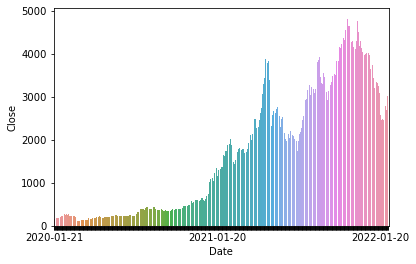

In [22]:
#ETH
bar_plot = sns.barplot(x="Date", y="Close", data=eth_df)
for index, label in enumerate(bar_plot.get_xticklabels()):
   if index % 365 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)

## 
Data visualization for the price of Bitcoin from 2020-01-21 to 2022-02-07 stored in **btc_df**.

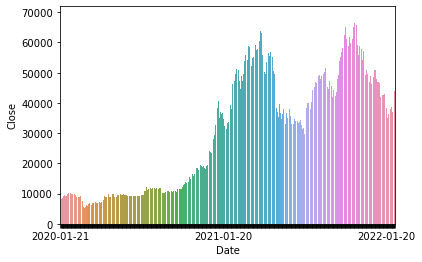

In [23]:
# BTC
bar_plot = sns.barplot(x="Date", y="Close", data=btc_df)
for index, label in enumerate(bar_plot.get_xticklabels()):
   if index % 365 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)

## 
Data visualization for the total number of covid cases from 2020-01-21 to 2022-02-07 stored in **covid_df**.

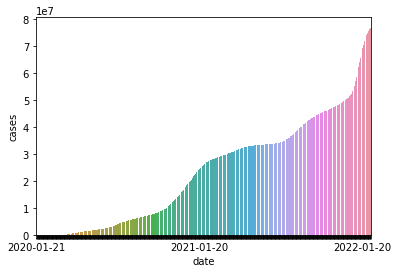

In [24]:
# Covid
bar_plot = sns.barplot(x="date", y="cases", data=covid_df)
for index, label in enumerate(bar_plot.get_xticklabels()):
   if index % 365 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)

## 
Data visualization for the number of daily new covid cases from 2020-01-21 to 2022-02-07 stored in **covid_df**.

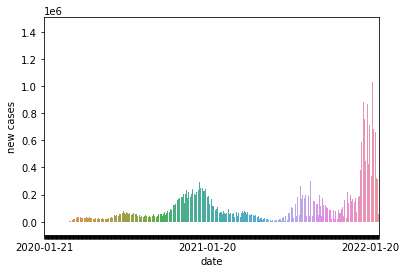

In [25]:
#New Cases
bar_plot = sns.barplot(x="date", y="new cases", data=covid_df)
for index, label in enumerate(bar_plot.get_xticklabels()):
   if index % 365 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)

## 
Data visualization for the close price of the Nasdaq from 2020-01-21 to 2022-02-07 stored in **nasdaq_df**.

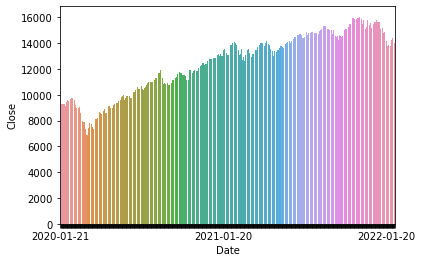

In [26]:
# Nasdaq
bar_plot = sns.barplot(x="Date", y="Close", data=nasdaq_df)
for index, label in enumerate(bar_plot.get_xticklabels()):
   if index % 365 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)

## Data Description

We need to setup the all the dataframes for a time series analysis where we find the correlation between sets of data. To do this, we call the pct_change() function to find the percent change in covid cases or close prices from one day to the next. Finding the percent changes for each observation will help us in finding the correlation.

In [27]:
covid_df['change'] = covid_df['new cases'].pct_change()
btc_df['Returns'] = btc_df['Close'].pct_change()
eth_df['Returns'] = eth_df['Close'].pct_change()
nasdaq_df['Returns'] = nasdaq_df['Close'].pct_change()
covid_df['change'].replace([np.inf, -np.inf], np.nan, inplace=True)

### ETH Price Data Description

#### What distributions do your variables take?

The distributions from the graph follows Poisson distribution, that shows the probability of events (in this case, represented by ETH trading volumes) in a specific interval of time (here, 21st Jan 2020 to 20th Jan 2022). 


#### Are there any outliers?

There are no ridiculous values caused by errors in measure and are all possible values for BTC prices to reach. To sum up, there are no outliers. 


#### What is the correlation?

We can plot the correlation between the percent change in daily covid cases and the percent change of the close prices of Etheruem.

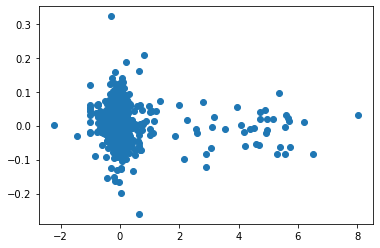

In [28]:
plt.scatter(covid_df['change'], eth_df['Returns'])
plt.show()

In [29]:
correlation = covid_df['change'].corr(btc_df['Returns'])
correlation

-0.06052889316727588

We find that the correlation between the percent change in daily covid cases and the percent change of the close prices of Etheruem is very low.

### BTC Price Data Description

#### What distributions do your variables take?

The distributions from the graph follows Poisson distribution, that shows the probability of events (in this case, represented by BTC trading volumes) in a specific interval of time (here, 21st Jan 2020 to 20th Jan 2022). 


#### Are there any outliers?

There are not ridiculously large or small value. BTC prices get very high at around March and April of 2021 but then fell off quickly. However, they are not caused by errors in measure and are possible values for ETH prices to reach. To sum up, there are no outliers. 


#### What is the correlation?

We can plot the correlation between the percent change in daily covid cases and the percent change of the close prices of Bitcoin.

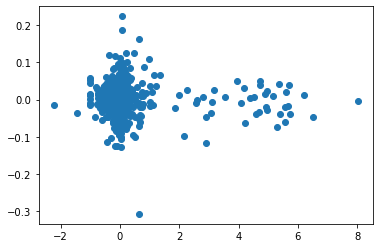

In [30]:
plt.scatter(covid_df['change'], btc_df['Returns'])
plt.show()

In [31]:
correlation = covid_df['change'].corr(btc_df['Returns'])
correlation

-0.06052889316727588

We find that the correlation between the percent change in daily covid cases and the percent change of the close prices of Bitcoin is very low.

### COVID-19 Total Cases Data Description

#### What distributions do your variables take?

The distributions from the graph follows Poisson distribution, that shows the probability of random events (in this case, the random event is people getting COVID-19, and the data is represented by the sum of new cases on a day added to pre-existing cases number) in a specific interval (from 21st Jan 2020 to 20th Jan 2022).


#### Are there any outliers?

There are no outliers.

### COVID-19 Daily New Cases Data Description

#### What distributions do your variables take?

The distributions from the graph follows Poisson distribution, that shows the probability of random events (in this case, the random event is people getting COVID-19 each day) in a specific interval of time (from 21st Jan 2020 to 20th Jan 2022). 


#### Are there any outliers?

There are no outliers. 


### NASDAQ Index Data Description

#### What distributions do your variables take?

The distribution from the graph follows Poisson distribution, that shows the probability of random events (in this case, the random event is the volume of trades on Nasdaq Exchange in a day, and the data is represented in the form of Nasdaq index) in a specific interval of time (from 21st Jan 2020 to 20th Jan 2022). 


#### Are there any outliers?

There are no outliers. 


#### What is the correlation?

We can plot the correlation between the percent change in daily covid cases and the percent change of the close prices of the Nasdaq.

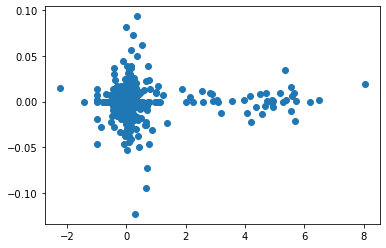

In [32]:
plt.scatter(covid_df['change'], nasdaq_df['Returns'])
plt.show()

In [33]:
correlation = covid_df['change'].corr(nasdaq_df['Returns'])
correlation

0.010682328704392

We find that the correlation between the percent change in daily covid cases and the percent change of the close prices of the Nasdaq is very low.

### Is there even a correlation between cryptocurrency (BTC) and stocks (Nasdaq)?

Although this question will have no impact on the main research question, this is an intresting analysis, as if there truly is no correlation between cryptocurrency and stocks, then it would have been a misconception to use stocks as an indicator of the economy in the first place.

We can plot the correlation between the percent change in the close prices of Bitcoin and the percent change of the close prices of the Nasdaq.

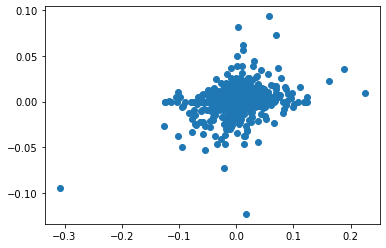

In [34]:
plt.scatter(btc_df['Returns'], nasdaq_df['Returns'])
plt.show()

In [35]:
correlation = btc_df['Returns'].corr(nasdaq_df['Returns'])
correlation

0.28542921163950274

We find that the correlation between the percent change in daily covid cases and the percent change of the close prices of the Nasdaq low, but there does seem to be a slight correlation. At least the correlation is greater than those of the other comparisons.

### Relationship between variables

Based on the graphs, we can see that there is a slight correlation between the NASDAQ index and the cryptocurrency prices (for both ETH and BTC). 
As for COVID cases, we do see a trend of growing for cryptocurrency prices when there is a decline in daily new cases of COVID-19. Starting from January 2021, the COVID-19 daily cases experiences a decline and cryptocurrency prices experience a large increase. The decline is not very obvious from the graph but the rising of cryptocurrency price is pretty large, for both ETH and BTC, and such rise is more obvious when it comes to Bitcoin prices. However, when performing a correlation analysis on the data, we get an insignificant value for the correlation.
To conclude, COVID-19 cases are not an accurate indicator of cryptocurrency prices.

# Ethics & Privacy

Concerning the topic of privacy, our group should have very little to worry about. We are looking at data at a world-wide scale instead of using surveys, which have a potential to leak private information. All of our data will be sourced from aggragate data that will contain not personal information. Even though we have no privacy concerns, we're faced with other ethical issues. People can potentially misinterpret our analysis and only use covid cases as a predictor for the prices of cyrptocurrency, when in reality, the prices of crypto are influenced by a multitude and variables. Covid cases should not be the sole variable that is considered when predicting cyrptocurrency prices. Additionally there is an inherent bias in our anaylsis where we are observing the largest cryptocurrencies, Bitcoin and Ethereum, while the correlation may be different for smaller coins. The results from our project may influence people's decisions regarding the buying or selling of smaller coins, where the correlation we found for Bitcoin and Ethereum may not hold true. 

# Conclusion & Discussion

As discussed in the "Relationship between variables" part, we do not see a correlation between COVID-19 daily new cases and the general shape of cryptocurrency. 

Even if such correlation can be used as an indicator, statistically a correlation does not indicate causation, and statistically this model might not be a good indicator. Firstly, there is no clear statistical test values to indicate the significance of our model, and hence cannot prove from a statistical aspect that our model is a good indicator for the two variables. Secondly, our data is only recorded from the past two years, when the COVID-19 took place. Historically, pandemic end eventually and COVID-19 does have a high possibility to end in the expected future. As a result, using COVID-19 as the cryptocurrency, which may not extinguish in the expected future, is not statistically a good idea. 

As a result, our conclusion is that neither NASDAQ or COVID-19 cases is a good indicator for the cryptocurrency prices. 

# Team Contributions

- Marco Paredes
    - helped generate research question, helped creating a introduction, helped in the prior work, and helped with researching similar studies. Explained the introduction and prior research in the video.
- Alan Hang
    - Was involved with data cleaning, general formatting of the notebook, providing descriptions where needed, and the ethics statement. Explained the hypothesis and datasets in the video.
- Zehong Li
    - Was involved with general formatting of the notebook, data description and analysis, conclusion, and ideas on data analysis. Explained the data analysis in the video.
- Danyal Iqbal
    - Helped generate research question, helped curate data to be analyzed, and helped create data visualizations. Explained the findings and conclusion in the video.